<a href="https://colab.research.google.com/github/radhakrishnan-omotec/football_predict/blob/main/Aditya_Raunaq_Project_Final_Football_player_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Football-player-price-prediction

In [1]:
!git clone https://github.com/radhakrishnan-omotec/football_predict.git

Cloning into 'football_predict'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 31 (delta 13), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (31/31), 2.63 MiB | 6.78 MiB/s, done.
Resolving deltas: 100% (13/13), done.


## To train the models

## To deploy the model

It is the Random Forest according to our implementation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import itertools
import json
import pickle

In [3]:
df = pd.read_csv('/content/football_predict/football.csv')

In [9]:
df.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


In [10]:
df.head(460)

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,Pablo Zabaleta,West+Ham,32,RB,3,7.0,698,5.0,2.70%,45,3.0,Argentina,0,5,20,0,0
456,Edimilson Fernandes,West+Ham,21,CM,2,5.0,288,4.5,0.40%,38,2.0,Switzerland,0,1,20,0,1
457,Arthur Masuaku,West+Ham,23,LB,3,7.0,199,4.5,0.20%,34,4.0,Congo DR,0,2,20,0,1
458,Sam Byram,West+Ham,23,RB,3,4.5,198,4.5,0.30%,29,1.0,England,0,2,20,0,0


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_42, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_43, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_44, *['position_cat'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_45, *['market_value'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_46, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_47, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_48, *['position_cat'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_49, *['market_value'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_50, *[[['index', 'age'], ['age', 'position_cat'], ['position_cat', 'market_value'], ['market_value', 'page_views']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_51, *['index', 'age', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_52, *['index', 'position_cat', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_53, *['index', 'market_value', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_54, *['index', 'page_views', None], **{})
chart

In [5]:
df.tail()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
456,Edimilson Fernandes,West+Ham,21,CM,2,5.0,288,4.5,0.40%,38,2.0,Switzerland,0,1,20,0,1
457,Arthur Masuaku,West+Ham,23,LB,3,7.0,199,4.5,0.20%,34,4.0,Congo DR,0,2,20,0,1
458,Sam Byram,West+Ham,23,RB,3,4.5,198,4.5,0.30%,29,1.0,England,0,2,20,0,0
459,Ashley Fletcher,West+Ham,21,CF,1,1.0,412,4.5,5.90%,16,1.0,England,0,1,20,0,1
460,Diafra Sakho,West+Ham,27,CF,1,10.0,214,5.5,0.10%,12,4.0,Senegal,0,3,20,0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          461 non-null    object 
 1   club          461 non-null    object 
 2   age           461 non-null    int64  
 3   position      461 non-null    object 
 4   position_cat  461 non-null    int64  
 5   market_value  461 non-null    float64
 6   page_views    461 non-null    int64  
 7   fpl_value     461 non-null    float64
 8   fpl_sel       461 non-null    object 
 9   fpl_points    461 non-null    int64  
 10  region        460 non-null    float64
 11  nationality   461 non-null    object 
 12  new_foreign   461 non-null    int64  
 13  age_cat       461 non-null    int64  
 14  club_id       461 non-null    int64  
 15  big_club      461 non-null    int64  
 16  new_signing   461 non-null    int64  
dtypes: float64(3), int64(9), object(5)
memory usage: 61.4+ KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,461.0,26.804772,3.961892,17.00,24.0,27.0,30.0,38.0
position_cat,461.0,2.180043,1.000061,1.00,1.0,2.0,3.0,4.0
market_value,461.0,11.012039,12.257403,0.05,3.0,7.0,15.0,75.0
page_views,461.0,763.776573,931.805757,3.00,220.0,460.0,896.0,7664.0
fpl_value,461.0,5.447939,1.346695,4.00,4.5,5.0,5.5,12.5
fpl_points,461.0,57.314534,53.113811,0.00,5.0,51.0,94.0,264.0
region,460.0,1.993478,0.957689,1.00,1.0,2.0,2.0,4.0
new_foreign,461.0,0.034707,0.183236,0.00,0.0,0.0,0.0,1.0
age_cat,461.0,3.206074,1.279795,1.00,2.0,3.0,4.0,6.0
club_id,461.0,10.334056,5.726475,1.00,6.0,10.0,15.0,20.0


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,461.0,26.804772,3.961892,17.00,24.0,27.0,30.0,38.0
position_cat,461.0,2.180043,1.000061,1.00,1.0,2.0,3.0,4.0
market_value,461.0,11.012039,12.257403,0.05,3.0,7.0,15.0,75.0
page_views,461.0,763.776573,931.805757,3.00,220.0,460.0,896.0,7664.0
fpl_value,461.0,5.447939,1.346695,4.00,4.5,5.0,5.5,12.5
fpl_points,461.0,57.314534,53.113811,0.00,5.0,51.0,94.0,264.0
region,460.0,1.993478,0.957689,1.00,1.0,2.0,2.0,4.0
new_foreign,461.0,0.034707,0.183236,0.00,0.0,0.0,0.0,1.0
age_cat,461.0,3.206074,1.279795,1.00,2.0,3.0,4.0,6.0
club_id,461.0,10.334056,5.726475,1.00,6.0,10.0,15.0,20.0


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_55, *['count'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_56, *['mean'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_57, *['std'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_58, *['min'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_59, *['count'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_60, *['mean'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_61, *['std'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_62, *['min'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_63, *[[['count', 'mean'], ['mean', 'std'], ['std', 'min'], ['min', '25%']]], **{})
chart

In [8]:
df.describe()

,age,position_cat,market_value,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,460.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,26.804772,2.180043,11.012039,763.776573,5.447939,57.314534,1.993478,0.034707,3.206074,10.334056,0.303688,0.145336
std,3.961892,1.000061,12.257403,931.805757,1.346695,53.113811,0.957689,0.183236,1.279795,5.726475,0.460349,0.352822
min,17.000000,1.000000,0.050000,3.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,24.000000,1.000000,3.000000,220.000000,4.500000,5.000000,1.000000,0.000000,2.000000,6.000000,0.000000,0.000000
50%,27.000000,2.000000,7.000000,460.000000,5.000000,51.000000,2.000000,0.000000,3.000000,10.000000,0.000000,0.000000
75%,30.000000,3.000000,15.000000,896.000000,5.500000,94.000000,2.000000,0.000000,4.000000,15.000000,1.000000,0.000000
max,38.000000,4.000000,75.000000,7664.000000,12.500000,264.000000,4.000000,1.000000,6.000000,20.000000,1.000000,1.000000


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_9, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_10, *['position_cat'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_11, *['market_value'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_12, *['page_views'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_13, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_14, *['position_cat'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_15, *['market_value'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_16, *['page_views'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_17, *[[['age', 'position_cat'], ['position_cat', 'market_value'], ['market_value', 'page_views'], ['page_views', 'fpl_value']]], **{})
chart

 ## Step 1 : Training and testing the dataset

In [14]:
train_df, test_df = train_test_split(df)

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 67 to 322
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          345 non-null    object 
 1   club          345 non-null    object 
 2   age           345 non-null    int64  
 3   position      345 non-null    object 
 4   position_cat  345 non-null    int64  
 5   market_value  345 non-null    float64
 6   page_views    345 non-null    int64  
 7   fpl_value     345 non-null    float64
 8   fpl_sel       345 non-null    object 
 9   fpl_points    345 non-null    int64  
 10  region        344 non-null    float64
 11  nationality   345 non-null    object 
 12  new_foreign   345 non-null    int64  
 13  age_cat       345 non-null    int64  
 14  club_id       345 non-null    int64  
 15  big_club      345 non-null    int64  
 16  new_signing   345 non-null    int64  
dtypes: float64(3), int64(9), object(5)
memory usage: 48.5+ KB


In [16]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 182 to 161
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          116 non-null    object 
 1   club          116 non-null    object 
 2   age           116 non-null    int64  
 3   position      116 non-null    object 
 4   position_cat  116 non-null    int64  
 5   market_value  116 non-null    float64
 6   page_views    116 non-null    int64  
 7   fpl_value     116 non-null    float64
 8   fpl_sel       116 non-null    object 
 9   fpl_points    116 non-null    int64  
 10  region        116 non-null    float64
 11  nationality   116 non-null    object 
 12  new_foreign   116 non-null    int64  
 13  age_cat       116 non-null    int64  
 14  club_id       116 non-null    int64  
 15  big_club      116 non-null    int64  
 16  new_signing   116 non-null    int64  
dtypes: float64(3), int64(9), object(5)
memory usage: 16.3+ KB


In [17]:
test_df.to_csv('/content/football_predict/test_df.csv', index=False)

In [18]:
train_df.to_csv('/content/football_predict/train_df.csv', index=False)

## Step 2 : Pre-processing the dataset

In [19]:
# Remove % sign from fpl_sel and convert to float
train_df.fpl_sel = train_df.fpl_sel.apply(lambda x : float(x[:-1]))

In [20]:
train_df.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
67,Jiri Skalak,Brighton+and+Hove,25,LW,1,1.5,87,5.0,0.1,0,2.0,Czech Republic,0,3,3,0,0
56,Uwe Hunemeier,Brighton+and+Hove,31,CB,3,1.5,88,4.0,8.0,0,2.0,Germany,0,4,3,0,0
36,Simon Francis,Bournemouth,32,RB,3,2.5,167,4.5,4.0,89,1.0,England,0,5,2,0,0
314,Steven Davis,Southampton,32,CM,2,6.0,310,5.0,0.2,77,2.0,Northern Ireland,0,5,14,0,0
249,Fernandinho,Manchester+City,32,DM,2,18.0,595,5.0,0.8,78,3.0,Brazil,0,5,11,1,0


In [21]:
# Remove % sign from fpl_sel and convert to float
test_df.fpl_sel = test_df.fpl_sel.apply(lambda x : float(x[:-1]))

In [22]:
test_df.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
182,Tom Ince,Huddersfield,25,RW,1,7.0,512,6.0,2.6,0,1.0,England,0,3,8,0,0
402,Nordin Amrabat,Watford,30,LW,1,4.5,295,5.0,0.1,65,4.0,Morocco,0,4,18,0,0
444,Andre Ayew,West+Ham,27,LW,1,18.0,845,7.0,3.4,89,4.0,Ghana,0,3,20,0,1
74,Tom Heaton,Burnley,31,GK,4,4.0,717,5.0,13.5,149,1.0,England,0,4,4,0,0
453,Sofiane Feghouli,West+Ham,27,RW,1,12.0,394,5.5,0.2,55,4.0,Algeria,0,3,20,0,1


In [23]:
train_df = train_df.dropna()
train_df.shape

(344, 17)

In [24]:
test_df = test_df.dropna()
test_df.shape

(116, 17)

## Data Visualization:
### A. HEAT MAP

<ipython-input-25-9150eb4bafe6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(), annot=True, linewidth = 0.02, cmap="flare")


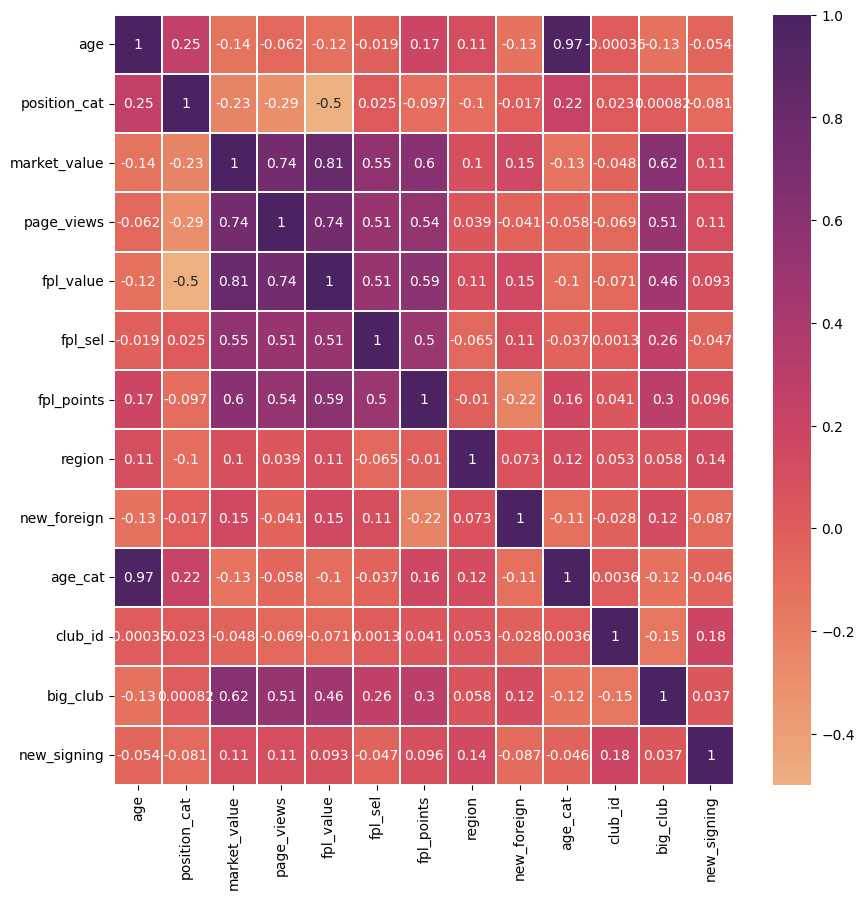

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(train_df.corr(), annot=True, linewidth = 0.02, cmap="flare")
plt.show()

#### Either use age or age_cat. They are highly correlated

#### Also, fpl_value, page_views are important for market_value

In [26]:
removed_df = train_df.drop(['name','club','age_cat','position'], axis=1)

In [27]:
removed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 67 to 322
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           344 non-null    int64  
 1   position_cat  344 non-null    int64  
 2   market_value  344 non-null    float64
 3   page_views    344 non-null    int64  
 4   fpl_value     344 non-null    float64
 5   fpl_sel       344 non-null    float64
 6   fpl_points    344 non-null    int64  
 7   region        344 non-null    float64
 8   nationality   344 non-null    object 
 9   new_foreign   344 non-null    int64  
 10  club_id       344 non-null    int64  
 11  big_club      344 non-null    int64  
 12  new_signing   344 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 37.6+ KB


In [28]:
removed_df.head()

,age,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,club_id,big_club,new_signing
67,25,1,1.5,87,5.0,0.1,0,2.0,Czech Republic,0,3,0,0
56,31,3,1.5,88,4.0,8.0,0,2.0,Germany,0,3,0,0
36,32,3,2.5,167,4.5,4.0,89,1.0,England,0,2,0,0
314,32,2,6.0,310,5.0,0.2,77,2.0,Northern Ireland,0,14,0,0
249,32,2,18.0,595,5.0,0.8,78,3.0,Brazil,0,11,1,0


## B. PAIR PLOT

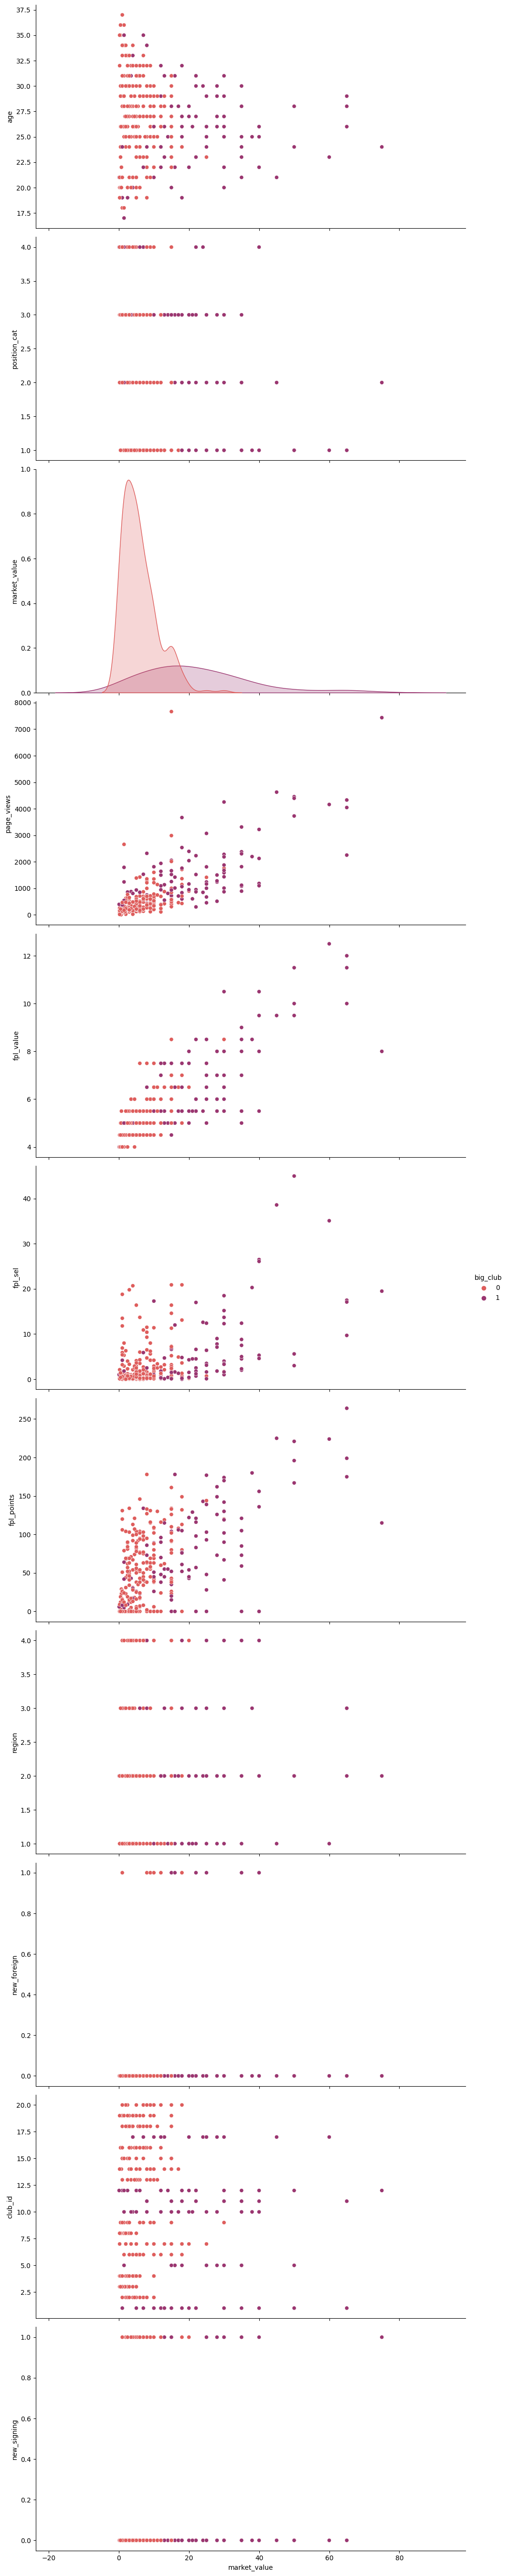

In [29]:
sns.pairplot(removed_df, x_vars='market_value', hue = 'big_club', height = 5, aspect = 2 , palette='flare')

The continuous variables are nicely correlated with the market value. Mostly linear

Those who belong to big club have higher market value

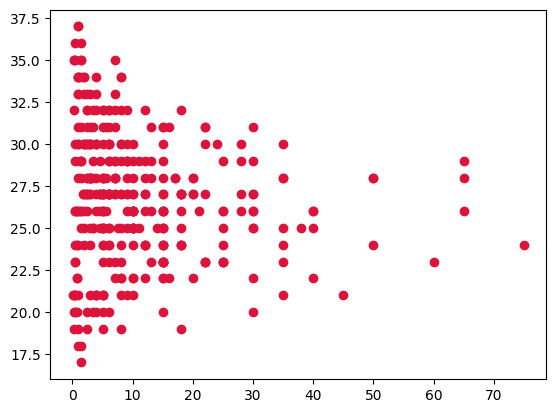

In [30]:
plt.scatter(removed_df.market_value, removed_df.age , c ='crimson')

Interestingly, it looks like a normal distribution.

Players aged around 25 have higher market value

**Binning might help**

* I'll bring back the age_cat attribute and move further with that one

In [31]:
removed_df = pd.concat([removed_df.drop('age', axis=1), df.age_cat], axis=1)

In [32]:
removed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 461 entries, 67 to 460
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   position_cat  344 non-null    float64
 1   market_value  344 non-null    float64
 2   page_views    344 non-null    float64
 3   fpl_value     344 non-null    float64
 4   fpl_sel       344 non-null    float64
 5   fpl_points    344 non-null    float64
 6   region        344 non-null    float64
 7   nationality   344 non-null    object 
 8   new_foreign   344 non-null    float64
 9   club_id       344 non-null    float64
 10  big_club      344 non-null    float64
 11  new_signing   344 non-null    float64
 12  age_cat       461 non-null    int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 50.4+ KB


In [33]:
all_columns = removed_df.columns
category_cols = ['position_cat', 'region', 'nationality', 'new_foreign', 'club_id', 'big_club', 'new_signing', 'age_cat']

In [34]:
all_columns

Index(['position_cat', 'market_value', 'page_views', 'fpl_value', 'fpl_sel',
       'fpl_points', 'region', 'nationality', 'new_foreign', 'club_id',
       'big_club', 'new_signing', 'age_cat'],
      dtype='object')

In [35]:
final_df = removed_df.copy()
final_df.reset_index(drop=True, inplace=True)

In [36]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   position_cat  344 non-null    float64
 1   market_value  344 non-null    float64
 2   page_views    344 non-null    float64
 3   fpl_value     344 non-null    float64
 4   fpl_sel       344 non-null    float64
 5   fpl_points    344 non-null    float64
 6   region        344 non-null    float64
 7   nationality   344 non-null    object 
 8   new_foreign   344 non-null    float64
 9   club_id       344 non-null    float64
 10  big_club      344 non-null    float64
 11  new_signing   344 non-null    float64
 12  age_cat       461 non-null    int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 46.9+ KB


In [37]:
column_dict = {i:[] for i in category_cols}
for i in category_cols:
    temp = pd.get_dummies(final_df[i], prefix=i)
    column_dict[i].extend(temp.columns)
    others = pd.Series(np.zeros(final_df.shape[0]), name=i+'_others')
    temp = pd.concat([temp, others], axis=1)
    final_df = pd.concat([final_df.drop(i, axis=1), temp], axis=1)

In [38]:
final_df.columns

Index(['market_value', 'page_views', 'fpl_value', 'fpl_sel', 'fpl_points',
       'position_cat_1.0', 'position_cat_2.0', 'position_cat_3.0',
       'position_cat_4.0', 'position_cat_others',
       ...
       'new_signing_0.0', 'new_signing_1.0', 'new_signing_others', 'age_cat_1',
       'age_cat_2', 'age_cat_3', 'age_cat_4', 'age_cat_5', 'age_cat_6',
       'age_cat_others'],
      dtype='object', length=108)

In [39]:
all_cat_cols = []
for i in column_dict.keys():
    all_cat_cols.extend(column_dict[i]+[i+'_others'])

all_cat_cols

['position_cat_1.0',
 'position_cat_2.0',
 'position_cat_3.0',
 'position_cat_4.0',
 'position_cat_others',
 'region_1.0',
 'region_2.0',
 'region_3.0',
 'region_4.0',
 'region_others',
 'nationality_Algeria',
 'nationality_Argentina',
 'nationality_Armenia',
 'nationality_Australia',
 'nationality_Austria',
 'nationality_Belgium',
 'nationality_Bosnia',
 'nationality_Brazil',
 'nationality_Cameroon',
 'nationality_Canada',
 'nationality_Chile',
 'nationality_Congo DR',
 "nationality_Cote d'Ivoire",
 'nationality_Croatia',
 'nationality_Curacao',
 'nationality_Czech Republic',
 'nationality_Denmark',
 'nationality_Ecuador',
 'nationality_Egypt',
 'nationality_England',
 'nationality_Estonia',
 'nationality_Finland',
 'nationality_France',
 'nationality_Germany',
 'nationality_Ghana',
 'nationality_Iceland',
 'nationality_Ireland',
 'nationality_Israel',
 'nationality_Italy',
 'nationality_Jamaica',
 'nationality_Japan',
 'nationality_Kenya',
 'nationality_Mali',
 'nationality_Morocco',

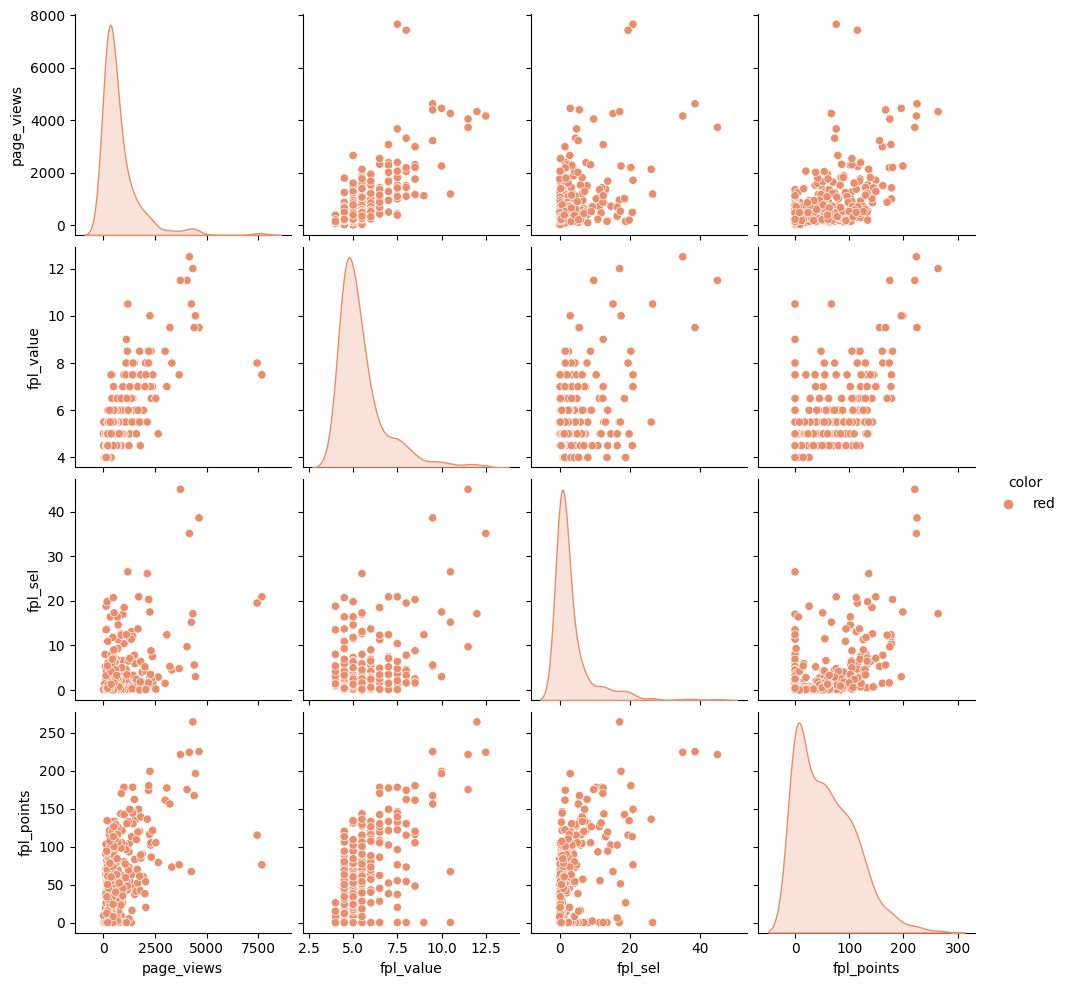

In [49]:
# Create a new column with a constant value ('red' in this case) for coloring
final_df['color'] = 'red'

# Select only continuous columns and the newly created 'color' column
cont_cols_df = final_df.drop(all_cat_cols + ['market_value'], axis=1)

# Set the Seaborn palette to 'flare'
sns.set_palette('flare')

# Create a Pairplot with 'hue' set to the 'color' column
sns.pairplot(cont_cols_df, hue='color')

# Remove the 'color' column to avoid affecting the original DataFrame
final_df.drop('color', axis=1, inplace=True)

# Display the Pairplot
plt.show()

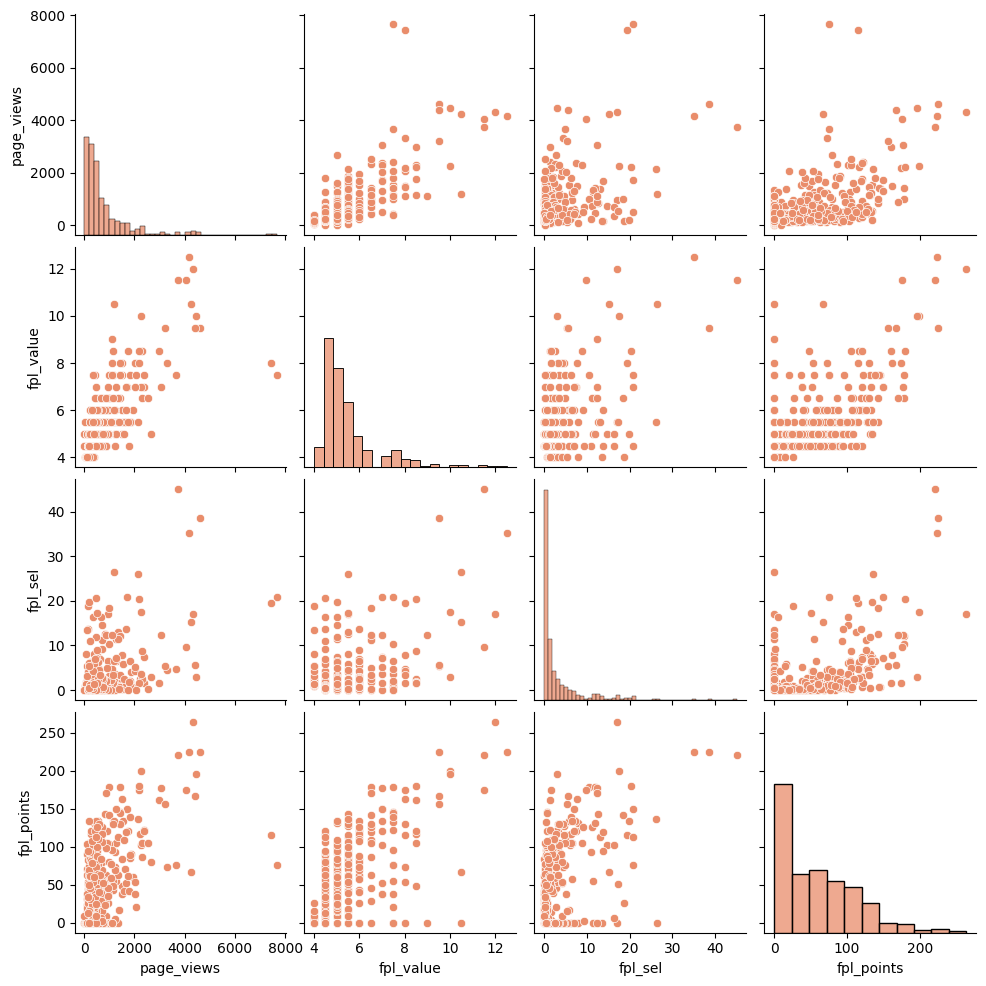

In [50]:
cont_cols_df = final_df.drop(all_cat_cols+['market_value'], axis = 1)
sns.set_palette('flare')
sns.pairplot(cont_cols_df)


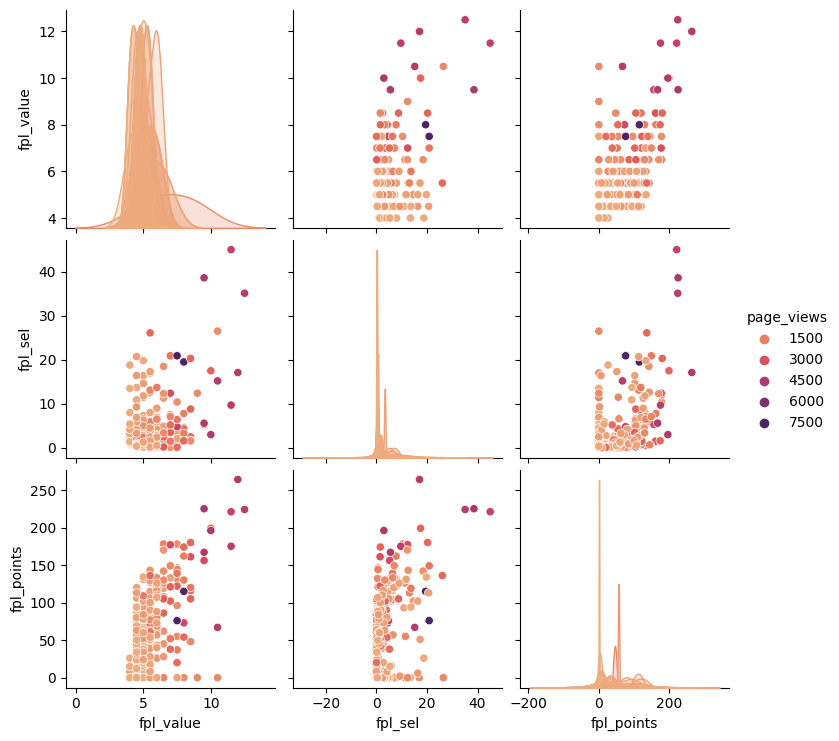

In [51]:
cont_cols_df = final_df.drop(all_cat_cols+['market_value'], axis = 1)
sns.pairplot(cont_cols_df, hue='page_views', palette='flare')

<hr>

## Take care of skewness by different transform

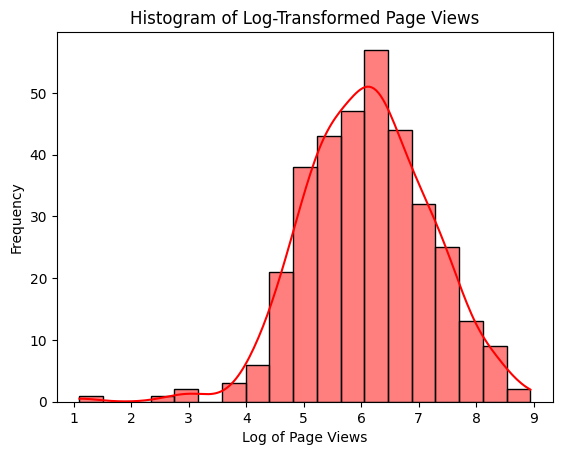

In [52]:
# Apply the logarithm transformation to the 'page_views' column
cont_cols_df['page_views'] = cont_cols_df['page_views'].apply(np.log)

# Create a red histogram using Seaborn
sns.histplot(data=cont_cols_df, x='page_views', color='red', kde=True)

# Label the axes and add a title if needed
plt.xlabel('Log of Page Views')
plt.ylabel('Frequency')
plt.title('Histogram of Log-Transformed Page Views')

# Display the histogram
plt.show()

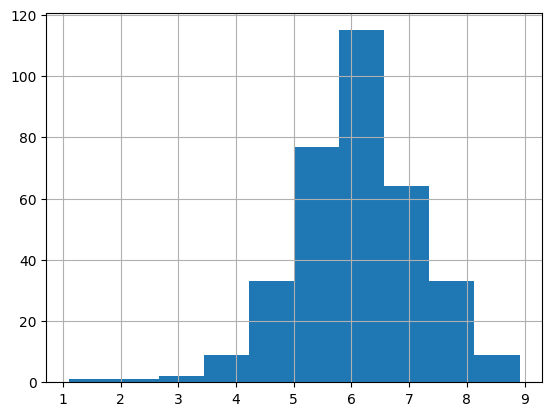

In [57]:
cont_cols_df.page_views.apply(np.log).hist()
cont_cols_df.page_views = cont_cols_df.page_views.apply(np.log)

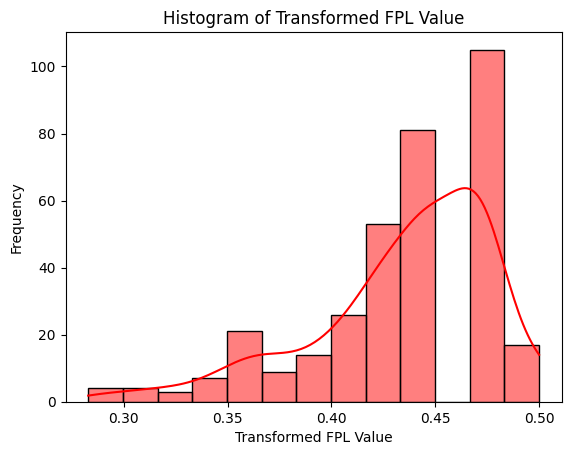

In [53]:
# Assuming 'cont_cols_df' is your DataFrame with a 'fpl_value' column

# Apply the transformation to the 'fpl_value' column
cont_cols_df['fpl_value'] = cont_cols_df['fpl_value'].apply(lambda x: x**(-1/2))

# Create a red histogram using Seaborn
sns.histplot(data=cont_cols_df, x='fpl_value', color='red', kde=True)

# Label the axes and add a title if needed
plt.xlabel('Transformed FPL Value')
plt.ylabel('Frequency')
plt.title('Histogram of Transformed FPL Value')

# Display the histogram
plt.show()

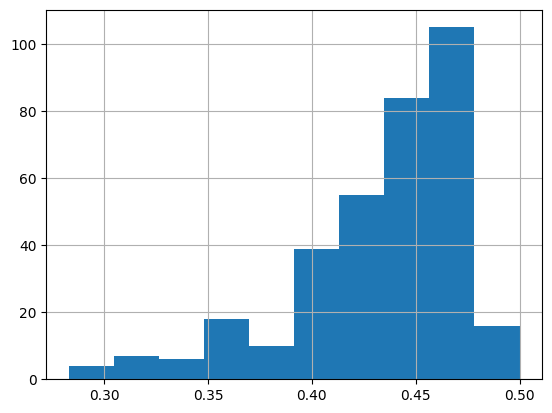

In [58]:
cont_cols_df.fpl_value.apply(lambda x : x**(-1/2)).hist()
cont_cols_df.fpl_value = cont_cols_df.fpl_value.apply(lambda x : x**(-1/2))

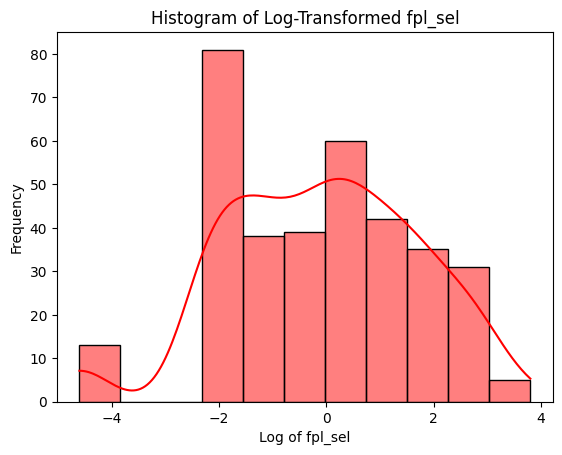

In [54]:
# Assuming 'cont_cols_df' is your DataFrame with a 'fpl_sel' column

# Apply the logarithm transformation to the 'fpl_sel' column
cont_cols_df['fpl_sel'] = cont_cols_df['fpl_sel'].apply(lambda x: np.log(x + 0.01))

# Create a red histogram using Seaborn
sns.histplot(data=cont_cols_df, x='fpl_sel', color='red', kde=True)

# Label the axes and add a title if needed
plt.xlabel('Log of fpl_sel')
plt.ylabel('Frequency')
plt.title('Histogram of Log-Transformed fpl_sel')

# Display the histogram
plt.show()

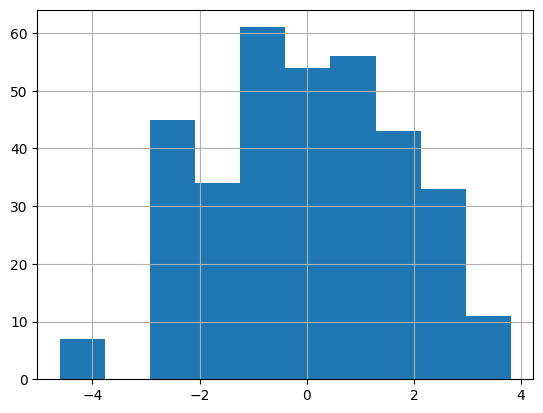

In [59]:
cont_cols_df.fpl_sel.apply(lambda x: np.log(x+0.01)).hist()
cont_cols_df.fpl_sel = cont_cols_df.fpl_sel.apply(lambda x: np.log(x+0.01))

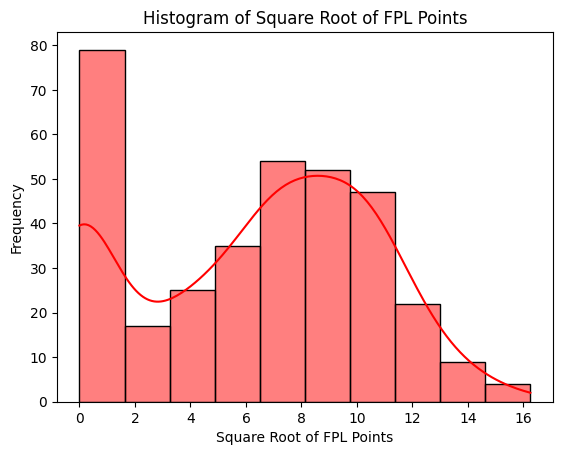

In [55]:
# Assuming 'cont_cols_df' is your DataFrame with a 'fpl_points' column

# Apply the square root transformation to the 'fpl_points' column
cont_cols_df['fpl_points'] = cont_cols_df['fpl_points'].apply(lambda x: x**(1/2))

# Create a red histogram using Seaborn
sns.histplot(data=cont_cols_df, x='fpl_points', color='red', kde=True)

# Label the axes and add a title if needed
plt.xlabel('Square Root of FPL Points')
plt.ylabel('Frequency')
plt.title('Histogram of Square Root of FPL Points')

# Display the histogram
plt.show()

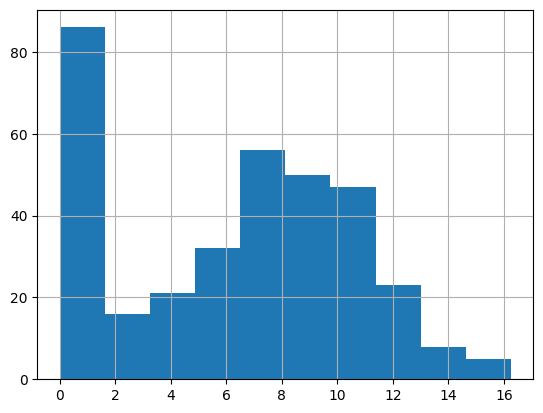

In [60]:
cont_cols_df.fpl_points.apply(lambda x : x**(1/2)).hist()
cont_cols_df.fpl_points = cont_cols_df.fpl_points.apply(lambda x : x**(1/2))

In [56]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
scalar = MinMaxScaler()
cont_cols_scaled = scalar.fit_transform(cont_cols_df)

In [58]:
final_df[cont_cols_df.columns] = cont_cols_scaled

In [59]:
final_df.describe()

,market_value,page_views,fpl_value,fpl_sel,fpl_points,position_cat_1.0,position_cat_2.0,position_cat_3.0,position_cat_4.0,position_cat_others,...,new_signing_0.0,new_signing_1.0,new_signing_others,age_cat_1,age_cat_2,age_cat_3,age_cat_4,age_cat_5,age_cat_6,age_cat_others
count,344.000000,344.000000,344.000000,344.000000,344.000000,461.000000,461.000000,461.000000,461.000000,461.0,...,461.000000,461.000000,461.0,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.0
mean,10.939680,0.638982,0.701360,0.536986,0.384531,0.251627,0.195228,0.234273,0.065076,0.0,...,0.633406,0.112798,0.0,0.108460,0.164859,0.325380,0.273319,0.069414,0.058568,0.0
std,12.052597,0.137361,0.201539,0.213723,0.262247,0.434419,0.396807,0.424004,0.246928,0.0,...,0.482398,0.316690,0.0,0.311298,0.371456,0.469025,0.446147,0.254433,0.235070,0.0
min,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,3.000000,0.545540,0.577487,0.361924,0.150756,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,7.000000,0.640057,0.756921,0.548632,0.433007,0.000000,0.000000,0.000000,0.000000,0.0,...,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,15.000000,0.731757,0.868319,0.696713,0.594321,1.000000,0.000000,0.000000,0.000000,0.0,...,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0
max,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_64, *['market_value'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_65, *['page_views'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_66, *['fpl_value'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_67, *['fpl_sel'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_68, *['market_value'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_69, *['page_views'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_70, *['fpl_value'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_71, *['fpl_sel'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_72, *[[['market_value', 'page_views'], ['page_views', 'fpl_value'], ['fpl_value', 'fpl_sel'], ['fpl_sel', 'fpl_points']]], **{})
chart

In [60]:
# Save dataset
s = json.dumps(list(all_columns))
with open('all_columns.json', 'w') as f:
    json.dump(s, f)

cat_col_dict = json.dumps(column_dict)
with open('cat_col_dict.json', 'w') as f:
    json.dump(cat_col_dict, f)
final_df.to_csv('/content/football_predict/futbolPrepared.csv', index=False)

In [63]:
# reading csv file
dframe = pd.read_csv("/content/football_predict/futbolPrepared.csv")
dframe.head(461)

,market_value,page_views,fpl_value,fpl_sel,fpl_points,position_cat_1.0,position_cat_2.0,position_cat_3.0,position_cat_4.0,position_cat_others,...,new_signing_0.0,new_signing_1.0,new_signing_others,age_cat_1,age_cat_2,age_cat_3,age_cat_4,age_cat_5,age_cat_6,age_cat_others
0,1.5,0.429191,0.756921,0.285055,0.000000,1,0,0,0,0.0,...,1,0,0.0,0,0,1,0,0,0,0.0
1,1.5,0.430648,1.000000,0.794795,0.000000,0,0,1,0,0.0,...,1,0,0.0,0,0,0,1,0,0,0.0
2,2.5,0.512305,0.868319,0.712544,0.580621,0,0,1,0,0.0,...,1,0,0.0,0,0,0,0,1,0,0.0
3,6.0,0.591148,0.756921,0.361924,0.540062,0,1,0,0,0.0,...,1,0,0.0,0,0,0,0,1,0,0.0
4,18.0,0.674250,0.756921,0.522399,0.543557,0,1,0,0,0.0,...,1,0,0.0,0,0,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0.0,...,0,0,0.0,0,0,1,0,0,0,0.0
457,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0.0,...,0,0,0.0,0,0,0,1,0,0,0.0
458,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0.0,...,0,0,0.0,0,0,1,0,0,0,0.0
459,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0.0,...,0,0,0.0,0,1,0,0,0,0,0.0


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_73, *['market_value'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_74, *['page_views'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_75, *['fpl_value'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_76, *['fpl_sel'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_77, *['market_value'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_78, *['page_views'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_79, *['fpl_value'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_80, *['fpl_sel'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_81, *[[['market_value', 'page_views'], ['page_views', 'fpl_value'], ['fpl_value', 'fpl_sel'], ['fpl_sel', 'fpl_points']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_82, *['position_cat_others', 'market_value', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_83, *['position_cat_others', 'page_views', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_84, *['position_cat_others', 'fpl_value', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_85, *['position_cat_others', 'fpl_sel', None], **{})
chart

<hr><hr>

# Load Fresh data

In [64]:
df = pd.read_csv('/content/football_predict/futbolPrepared.csv')
df.columns

Index(['market_value', 'page_views', 'fpl_value', 'fpl_sel', 'fpl_points',
       'position_cat_1.0', 'position_cat_2.0', 'position_cat_3.0',
       'position_cat_4.0', 'position_cat_others',
       ...
       'new_signing_0.0', 'new_signing_1.0', 'new_signing_others', 'age_cat_1',
       'age_cat_2', 'age_cat_3', 'age_cat_4', 'age_cat_5', 'age_cat_6',
       'age_cat_others'],
      dtype='object', length=108)

In [65]:
X, y = df.drop('market_value', axis=1), df['market_value']
print( "X = ", X)
print("y= ",y )

X =       page_views  fpl_value   fpl_sel  fpl_points  position_cat_1.0  \
0      0.429191   0.756921  0.285055    0.000000                 1   
1      0.430648   1.000000  0.794795    0.000000                 0   
2      0.512305   0.868319  0.712544    0.580621                 0   
3      0.591148   0.756921  0.361924    0.540062                 0   
4      0.674250   0.756921  0.522399    0.543557                 0   
..          ...        ...       ...         ...               ...   
456         NaN        NaN       NaN         NaN                 0   
457         NaN        NaN       NaN         NaN                 0   
458         NaN        NaN       NaN         NaN                 0   
459         NaN        NaN       NaN         NaN                 0   
460         NaN        NaN       NaN         NaN                 0   

     position_cat_2.0  position_cat_3.0  position_cat_4.0  \
0                   0                 0                 0   
1                   0           

<hr><hr>

# Nearest Neighbors Algorithm

In [66]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold, cross_validate

In [67]:
def kfold_verify(X, y, model):
    kfcv = KFold(shuffle=True)
    cv_scores = cross_validate(model, X, y, cv=kfcv, scoring='neg_root_mean_squared_error' )
    print("test_score =", np.mean(cv_scores['test_score']))
    return -(np.mean(cv_scores['test_score']))         # Lower is better

In [68]:
def eval_weights(weight_arr, X, y):
    """
    Parameters:-
    weight_arr: 1D array, indicating the weights for each attributes
    Returns:-
    The cross-validation error rate for given weights
    """
    model = KNeighborsRegressor(10, metric='wminkowski', metric_params={'w':weight_arr})
    return kfold_verify(X, y, model)

## Optimize weights using Genetic Algorithm

In [69]:
class GA(object):
    # Genetic Algorithm to maximize the accuracy by finding optimal attribute weights
    def __init__(self, pop_size, num_parents, num_offspring):
        """
        Parameters:-
        pop_size : tuple, indicating the size of population and the number of genes in one chromosome
        num_parents: int, indicating the number of parents to be chosen for crossover
        num_offspring: int, indicating the number of offsprings to be produced for next generation
        """
        self.pop_size = pop_size
        self.np = num_parents
        self.no = num_offspring

    def initialize(self, X, y):
        self.X = X
        self.y = y
        self.pop = np.random.uniform(5, size=self.pop_size)

    def calc_fitness(self, eval_func):
        """
        Parameters:-
        eval_func: callable, outputs the score of a chromosome. This score needs to be maximised/minimised
        """
        fitness = np.zeros(self.pop.shape[0])
        for i in range(self.pop.shape[0]):
            fitness[i] = eval_func(self.pop[i,:], self.X, self.y)
        return fitness
    def get_parents(self, fitness):
        """
        Parameters:-
        fitness: array, indicating the fitness score for each chromosome
        """
        sorted_fitness = np.argsort(fitness)
        self.parents = np.empty((self.np, self.pop_size[1]))
        for i in range(self.np):
            self.parents[i] = self.pop[sorted_fitness[i],:]

        return self.parents

    def crossover(self):
        cross_point = self.pop_size[1] // 2
        # create pair of parents to produce offspring
        candidates = itertools.product(range(self.parents.shape[0]), repeat=2)
        self.offspring = np.empty((self.no, self.pop_size[1]))
        count = 1
        for i in candidates:
            if i[0] != i[1]:
                p1 = self.parents[i[0],:]
                p2 = self.parents[i[1],:]
                self.offspring[count-1, :cross_point] = p1[:cross_point]
                self.offspring[count-1, cross_point:] = p2[cross_point:]
                count += 1

            if count == self.no:
                break

        return self.offspring

    def get_optimal_genes(self, eval_func):
        fitness = self.calc_fitness(eval_func)
        sorted_fit = np.argsort(fitness)
        return self.pop[sorted_fit[0], :]

    def next_gen(self):
        self.pop = np.empty((self.np+self.no, self.pop_size[1]))
        self.pop[:self.np, :] = self.parents
        self.pop[self.np:, :] = self.offspring
        self.pop_size = self.pop.shape

In [71]:
pop_size = (100, X.shape[1])
genetic_obj = GA(pop_size, 10, 50)

In [72]:
genetic_obj.initialize(X, y)

In [ ]:
epochs = 10
for i in range(epochs):
    fit_score = genetic_obj.calc_fitness(eval_weights)
    next_gen_parents = genetic_obj.get_parents(fit_score)
    next_gen = genetic_obj.crossover()
    genetic_obj.next_gen()

In [ ]:
final_attr_weights = genetic_obj.get_optimal_genes(eval_weights)

## Verify the optimization

In [ ]:
knn_no_weights = KNeighborsRegressor(10)
knn_weights = KNeighborsRegressor(10, metric='wminkowski', metric_params={'w':final_attr_weights})

print('RMSE for No attribute Weights:', kfold_verify(X, y, knn_no_weights))
print('RMSE for genetically optimized attribute weights:', kfold_verify(X, y, knn_weights))

## _Tuning Number of neighbours_

In [ ]:
from yellowbrick.model_selection import ValidationCurve

In [ ]:
n_neighbours = np.arange(1, 25, 1)
viz = ValidationCurve(knn_weights, param_name='n_neighbors', param_range=n_neighbours, cv = KFold(shuffle=True), scoring='neg_root_mean_squared_error')
viz.fit(X,y)
# viz.show()

At around 15 nearest neighbours, The model performs well on training as well as validation set

In [ ]:
# Final model
knn_weights = KNeighborsRegressor(15, metric='wminkowski', metric_params={'w':final_attr_weights})
knn_weights.fit(X,y)

In [ ]:
with open('knn_best.pkl', 'wb') as f:
    pickle.dump(knn_weights, f)

<hr><hr>


# Random Forest

In [92]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor()
kfold_verify(X,y,rf)

## _Tuning n_estimators_

In [ ]:
viz = ValidationCurve(rf, param_name='n_estimators', param_range=np.arange(50, 200), cv = KFold(shuffle=True), scoring='neg_root_mean_squared_error')
viz.fit(X,y)

In [ ]:
criterion = ['mse', 'mae']
viz = ValidationCurve(rf, param_name='criterion', param_range=criterion, cv = KFold(shuffle=True), scoring='neg_root_mean_squared_error')
viz.fit(X,y)

In [ ]:
rf = RandomForestRegressor()
rf.fit(X, y)

In [ ]:
with open('random_forest_best.pkl', 'wb') as f:
    pickle.dump(rf, f)

<hr><hr>

# Test data processing pipeline

In [ ]:
test_df = pd.read_csv('test_df.csv')

In [ ]:
# Read all_columns.json, cat_col_dict.json

with open('all_columns.json', 'r') as f:
    all_columns = json.load(f)

with open('cat_col_dict.json', 'r') as f:
    cat_col_dict = json.load(f)

In [ ]:
all_columns = eval(all_columns)
cat_col_dict = eval(cat_col_dict)

In [ ]:
test_df = test_df[all_columns]

In [ ]:
test_df.fpl_sel = test_df.fpl_sel.apply(lambda x : float(x[:-1]))

In [ ]:
test_df = test_df.dropna()
test_df.reset_index(drop=True, inplace=True)

In [ ]:
for i in cat_col_dict.keys():
    temp = pd.get_dummies(test_df[i], prefix=i)

    drop1 = set(cat_col_dict[i])
    drop2 = set(temp.columns)
    drop_cols = list(drop1.intersection(drop2))

    orig = pd.DataFrame(np.zeros((temp.shape[0], len(cat_col_dict[i]))), columns=cat_col_dict[i])
    orig[drop_cols] = temp[drop_cols]

    others = temp.drop(drop_cols, axis=1)
    if others.shape[1] == 0:
        others = pd.Series(np.zeros(temp.shape[0]))
    else:
        others = others.apply(np.sum, axis=1)
    others.name = i+'_others'
    test_df = pd.concat([test_df.drop(i, axis=1), orig, others], axis=1)

In [ ]:
cont_cols = list(set(all_columns) - set(cat_col_dict.keys()))
test_cont_cols = test_df[cont_cols].drop('market_value',axis=1)

In [ ]:
test_cont_cols.page_views = test_cont_cols.page_views.apply(np.log)
test_cont_cols.fpl_sel = test_cont_cols.fpl_sel.apply(lambda x : np.log(x+0.01))
test_cont_cols.fpl_points = test_cont_cols.fpl_points.apply(lambda x : x **(1/2))
test_cont_cols.fpl_value = test_cont_cols.fpl_value.apply(lambda x : x ** (-1/2))

In [ ]:
test_cont_cols_scaled = scalar.transform(test_cont_cols)
test_df[test_cont_cols.columns] = test_cont_cols_scaled

In [ ]:
test_X, test_y = test_df.drop('market_value', axis=1), test_df['market_value']

In [ ]:
import os
models = {}
for filename in os.listdir():
    if filename.endswith('.pkl'):
        with open(filename, 'rb') as f:
            models[filename[:-4]] = pickle.load(f)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
for model, obj in models.items():
    y_pred = obj.predict(test_X)
    score = mean_squared_error(test_y.values, y_pred, squared=False)
    print(f'RMSE Score for {model} = {score}')

# End of Project

<hr><hr>